# First This in Python

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

##The Notebook Interface

The Jupyter/Ipython notebook allows the interleaving of code and documentation/explanation/etc. There are markdown cells in which one can use markdown. See examples below.

Look up [Google](http:/www.google.com). Or go to http://www.apple.com .
Lets eat a burrito. $\alpha = \frac{\beta}{\gamma}$

Look Ma! An image:
![An Image](https://dl.dropboxusercontent.com/u/75194/allyourbayes.jpg)

1. an item
2. another item
3. i like items

And some un-numbered items

##The Python Language

Lets talk about using Python as a calculator...

In [7]:
1+2

3

In [8]:
1/2,1.0/2.0,3*3.2 #Notice the integer division and this comment. Comma separated values return a "tuple"

(0, 0.5, 9.600000000000001)

In [9]:
print 1+3.0,"\n",5/3.0
5/3

4.0 
1.66666666667


1

In [10]:
a=5.0/6.0
print(a)
print type(a)

0.833333333333
<type 'float'>


In [11]:
import types
type(a)==types.FloatType

True

In [12]:
type(a)==types.IntType #Conditionals return a True or False

False

## Python and Iteration (and files)

Python has a certain way of doing things. Lets talk about listiness. Listiness works on lists, dictionaries, files, and other constructs. Python provides an iteration protocol which lets you treat many things as a "just-in-time" list. In other words things that follow the *iterator protocol* are pregnant with iteration; waiting to be used.

In [13]:
alist=[1,2,3,4,5]
asquaredlist=[i*i for i in alist] #this is called a list comprehension
asquaredlist

[1, 4, 9, 16, 25]

Python has some nifty functions like `enumerate` and `zip`. The first is something you can iterate over, but the second does the iteration for you and becomes a list.

In [14]:
print enumerate(asquaredlist) #gives an iteratot
print zip(alist, asquaredlist) #gives a list

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]


Someone realized that design flaw and created izip, which returns something following the iterator protocol.

In [15]:
from itertools import izip #and this is how you import things into your current namespace
myzip = izip(alist, asquaredlist)

In [16]:
list(myzip)#calling the ietaror function finishes the pregnancy

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

In [17]:
[k for k in enumerate(asquaredlist)] #as does, as you might expect, iteration

[(0, 1), (1, 4), (2, 9), (3, 16), (4, 25)]

Open files behave like lists too!

In [18]:
linefirsts=[line[0:30] for line in open("hamlet.txt")] #first 31 characters of each line are saved in the list
print linefirsts[30:59] # second 30 lines in hamlet; first 11 chars on each line

IOError: [Errno 2] No such file or directory: 'hamlet.txt'

But perhaps we want to access Hamlet word by word and not line by line

In [19]:
hamletfile=open("hamlet.txt")
hamlettext=hamletfile.read()
hamletfile.close()
hamlettokens=hamlettext.split()
len(hamlettokens)

IOError: [Errno 2] No such file or directory: 'hamlet.txt'

In [20]:
with open("hamlet.txt") as hamletfile:# no need to close, this is taken care of for you in this mode
    hamlettext=hamletfile.read()
    hamlettokens=hamlettext.split()
    print len(hamlettokens)

IOError: [Errno 2] No such file or directory: 'hamlet.txt'

###Other indexing of lists

In [21]:
print hamlettokens[1:4], hamlettokens[:4], hamlettokens[0], hamlettokens[-1]

NameError: name 'hamlettokens' is not defined

In [22]:
hamlettokens[1:8:2]

NameError: name 'hamlettokens' is not defined

range and xrange get the list of integers upto N. But xrange behaves like an iterator.

In [23]:
mylist=[]
print xrange(10)#iterator protocol
print range(10)#list
for i in xrange(10):
    mylist.append(i)
mylist

xrange(10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

The iterator protocxol is useful when things are large, like files, or data. It saves memory as the entire list is not saved from the very beginning.

## Dictionaries

These are pairs with a key dnd a value.

These are the bread and butter. You will use them a lot. They even behave like lists. But be careful how.

In [24]:
adict={'one':1, 'two': 2, 'three': 3} #key 'one' value 1
print [i for i in adict], "|", [(k,v) for k,v in adict.items()], "|", adict.values()

['three', 'two', 'one'] | [('three', 3), ('two', 2), ('one', 1)] | [3, 2, 1]


The keys do not have to be strings. From python 2.7 you can use dictionary comprehensions as well

In [25]:
mydict ={k:v for (k,v) in zip(alist, asquaredlist)}#note that keys do not have to be strings
mydict

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25}

###and conversion to json

json is used to transport data into javascript

In [26]:
import json

In [27]:
s=json.dumps(mydict)#dump to string
print s

{"1": 1, "2": 4, "3": 9, "4": 16, "5": 25}


Lets write this little piece of json to a file

In [28]:
fd=open("my.json","w")#w for write (a for append). 
fd.write(s)
fd.close()

In [29]:
fd=open("my.json")
s=fd.read()
fd.close()
json.loads(s)#load from string

{u'1': 1, u'2': 4, u'3': 9, u'4': 16, u'5': 25}

## Strings

Basically they behave like immutable lists

In [30]:
lastword=hamlettokens[-1]
print(lastword)

NameError: name 'hamlettokens' is not defined

In [31]:
lastword[-2]="k"

NameError: name 'lastword' is not defined

In [28]:
lastword[-2]

'.'

In [29]:
wierdstring=",".join(hamlettokens)
wierdstring[:1000]

"\xef\xbb\xbfXXXX,HAMLET,,PRINCE,OF,DENMARK,by,William,Shakespeare,PERSONS,REPRESENTED.,Claudius,,King,of,Denmark.,Hamlet,,Son,to,the,former,,and,Nephew,to,the,present,King.,Polonius,,Lord,Chamberlain.,Horatio,,Friend,to,Hamlet.,Laertes,,Son,to,Polonius.,Voltimand,,Courtier.,Cornelius,,Courtier.,Rosencrantz,,Courtier.,Guildenstern,,Courtier.,Osric,,Courtier.,A,Gentleman,,Courtier.,A,Priest.,Marcellus,,Officer.,Bernardo,,Officer.,Francisco,,a,Soldier,Reynaldo,,Servant,to,Polonius.,Players.,Two,Clowns,,Grave-diggers.,Fortinbras,,Prince,of,Norway.,A,Captain.,English,Ambassadors.,Ghost,of,Hamlet's,Father.,Gertrude,,Queen,of,Denmark,,and,Mother,of,Hamlet.,Ophelia,,Daughter,to,Polonius.,Lords,,Ladies,,Officers,,Soldiers,,Sailors,,Messengers,,and,other,Attendants.,SCENE.,Elsinore.,ACT,I.,Scene,I.,Elsinore.,A,platform,before,the,Castle.,[Francisco,at,his,post.,Enter,to,him,Bernardo.],Ber.,Who's,there?,Fran.,Nay,,answer,me:,stand,,and,unfold,yourself.,Ber.,Long,live,the,king!,Fran.,Bernardo?,Be

## Functions

Functions encapsulate complex behaviour. In Python, functions are what are called first-class objects. They can return other functions, and be passed to other functions. Functions can return stuff. If they dont, they are presumed to return `None`, a unuique object

In [32]:
def square(x):
    return(x*x)
def cube(x):
    return x*x*x
square(5),cube(5)

(25, 125)

In [33]:
print square, type(cube)

<function square at 0x1098101b8> <type 'function'>


In [34]:
def sum_of_anything(x,y,f):
    return f(x) + f(y)
sum_of_anything(3,4,square)

25

Functions have positional and keyword arguments. This is how you define them. The syntax `*posargs` is for an expanded tuple of arguments, and `**dictargs` if dor keyword style arguments. Posargs go into the tuple posargs and keyword arguments go into the dictionary dictargs.

In [35]:
def f(a,b,*posargs,**dictargs):
    print a,b,posargs, dictargs
f(1,3), f(1,3,4,d=1,c=2)
type(f(9,8))

1 3 () {}
1 3 (4,) {'c': 2, 'd': 1}
9 8 () {}


NoneType

You can also create a function with default arguments

In [36]:
def f2(a, b=4):
    print a,b
f2(1), f2(1,3)

1 4
1 3


(None, None)

In [37]:
g= lambda x, y: x+y#one line functions
g(2,3)

5

##Control-flow

This is about how a program makes decisions under conditions.

In [38]:
a=[1,2,3,4,5]
1 in a #test for belonging

True

In [39]:
6 in a

False

In [41]:
def do_it(x):
    if x==1:
        print "One"
    elif x==2:
        print "Two"
    else:
        print x
do_it(2)

Two


In [42]:
do_it(2), do_it(3)

Two
3


(None, None)

In [43]:
for i in range(10): #the for loop sets i sequentially to 0,1,2...,8,9
    print i
    if (i > 5):
        break #breaks you out of the for loop

0
1
2
3
4
5
6


In [44]:
i=0
while i < 10: #as long as the condition is true
    print i
    i=i+1
    if i < 5:
        continue #continues the while loop
    else:
        break #breaks you out of it


0
1
2
3
4


## Exceptions

This is the way python handles errors.

In [45]:
try:
    f(1)
except:
    import sys
    print sys.exc_info()

(<type 'exceptions.TypeError'>, TypeError('f() takes at least 2 arguments (1 given)',), <traceback object at 0x10980e560>)


## All together now

lets see what hamlet gives us

In [ ]:
hamletlctokens=[word.lower() for word in hamlettokens]#make lower case
hamletlctokens.count("thou")

NameError: name 'hamlettokens' is not defined

In [44]:
uniquelctokens=set(hamletlctokens) #sets remove duplicates
max(uniquelctokens), max(uniquelctokens, key=len) #the first uses alphanumerical, the second tells you the longest word token in Hamlet

('\xef\xbb\xbfxxxx', 'tragical-comical-historical-pastoral,')

In [45]:
tokendict={}
for ut in uniquelctokens:
    tokendict[ut]=hamletlctokens.count(ut)

In [46]:
L=sorted(tokendict.iteritems(), key= lambda (k,v):v, reverse=True)[:100]
L#sort by iteration over the targets(v) of the dictionary, in reverse order (ie most counts), the top 100

[('the', 1136),
 ('and', 943),
 ('to', 720),
 ('of', 667),
 ('a', 527),
 ('my', 512),
 ('i', 510),
 ('in', 420),
 ('you', 412),
 ('ham.', 358),
 ('that', 337),
 ('it', 324),
 ('is', 320),
 ('his', 295),
 ('not', 270),
 ('with', 264),
 ('this', 250),
 ('your', 241),
 ('for', 231),
 ('but', 228),
 ('as', 216),
 ('he', 202),
 ('be', 201),
 ('what', 183),
 ('have', 174),
 ('will', 149),
 ('so', 143),
 ('me', 142),
 ('we', 132),
 ('do', 128),
 ('are', 126),
 ('him', 122),
 ('our', 119),
 ('king.', 113),
 ('by', 111),
 ('hor.', 110),
 ('or', 109),
 ('if', 109),
 ('on', 109),
 ('no', 107),
 ('shall', 106),
 ('thou', 95),
 ('all', 95),
 ('from', 95),
 ('they', 93),
 ('let', 92),
 ('good', 88),
 ('at', 86),
 ('thy', 86),
 ('pol.', 86),
 ('how', 84),
 ('most', 82),
 ('lord,', 81),
 ('her', 76),
 ('more', 76),
 ('queen.', 76),
 ('like', 75),
 ('would', 74),
 ('was', 73),
 ("'tis", 70),
 ('you,', 66),
 ('may', 65),
 ('very', 64),
 ('laer.', 62),
 ('hath', 62),
 ('[enter', 61),
 ('lord.', 60),
 ('d

In [49]:
2*[1]#expanding a list

[1, 1]

[('the', 1136), ('and', 943), ('to', 720), ('of', 667), ('a', 527), ('my', 512), ('i', 510), ('in', 420), ('you', 412), ('ham.', 358), ('that', 337), ('it', 324), ('is', 320), ('his', 295), ('not', 270), ('with', 264), ('this', 250), ('your', 241), ('for', 231), ('but', 228)]


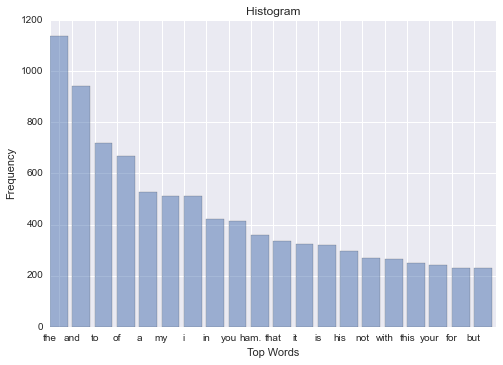

In [51]:
topfreq=L[:20]#get top 20
print topfreq
pos = range(len(topfreq))#get integers 0 to 19 as positions
plt.bar(pos, [e[1] for e in topfreq], alpha=0.5);#against the positions 0,1,2, plot a bar corresponding to the counts
plt.xticks(pos+[0.4]*len(topfreq), [e[0] for e in topfreq]);#get tick values from the labels of the counts
plt.xlabel("Top Words");
plt.ylabel("Frequency")
plt.title("Histogram");